<a href="https://colab.research.google.com/github/AbhiAadi/Optimizing-AC-energy-requirement/blob/main/DEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Data = pd.read_excel('Building energy data.xlsx')
Data.head()

,S.No.,Date and time,Radiative intensity,T_air,RH_air,DOAS VC chiller supplied cooling energy,Radiant VA chiller supplied cooling energy,Heating energy by gas boiler,Heating energy by solar collector,Heating energy by auxiliary heater
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2023-01-02 09:00:00,269.9375,24.80,90.50,193189.0,14366.48,46680.6,-22115.20,64837.04
3,2.0,2023-01-02 10:00:00,451.0000,26.40,82.75,208709.9,34892.06,0.0,71372.86,18735.79
4,3.0,2023-01-02 11:00:00,257.5000,27.75,72.75,204338.6,30993.46,0.0,79076.78,10746.26


In [5]:
Data = Data.drop(0 , axis = 0)

In [6]:
Data = Data.drop(1 , axis = 0)

In [7]:
Data.head()

,S.No.,Date and time,Radiative intensity,T_air,RH_air,DOAS VC chiller supplied cooling energy,Radiant VA chiller supplied cooling energy,Heating energy by gas boiler,Heating energy by solar collector,Heating energy by auxiliary heater
2,1.0,2023-01-02 09:00:00,269.9375,24.8000,90.500,193189.0,14366.48,46680.6,-22115.20,64837.04
3,2.0,2023-01-02 10:00:00,451.0000,26.4000,82.750,208709.9,34892.06,0.0,71372.86,18735.79
4,3.0,2023-01-02 11:00:00,257.5000,27.7500,72.750,204338.6,30993.46,0.0,79076.78,10746.26
5,4.0,2023-01-02 12:00:00,241.8750,28.5125,64.000,189399.4,21920.07,0.0,101663.50,-12261.10
6,5.0,2023-01-02 13:00:00,179.9375,28.6375,59.125,106161.8,29668.82,0.0,80126.27,9276.15


In [8]:
# Assuming 'datetime_column' is your datetime column
Data['Timestamp'] = pd.to_datetime(Data['Date and time']).astype(int) / 10**9
Data['Year'] = pd.to_datetime(Data['Date and time']).dt.year
Data['Month'] = pd.to_datetime(Data['Date and time']).dt.month
Data['Day'] = pd.to_datetime(Data['Date and time']).dt.day

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 2 to 2601
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   S.No.                                       2600 non-null   float64       
 1   Date and time                               2600 non-null   datetime64[ns]
 2   Radiative intensity                         2600 non-null   float64       
 3   T_air                                       2600 non-null   float64       
 4   RH_air                                      2600 non-null   float64       
 5   DOAS VC chiller supplied cooling energy     2600 non-null   float64       
 6   Radiant VA chiller supplied cooling energy  2600 non-null   float64       
 7   Heating energy by gas boiler                2600 non-null   float64       
 8   Heating energy by solar collector           2600 non-null   float64       
 9   Heating 

In [9]:
Data = Data.drop(['Date and time'], axis = 1)
# Data = Data[Data['Heating energy by auxiliary heater']>0]
Data

,S.No.,Radiative intensity,T_air,RH_air,DOAS VC chiller supplied cooling energy,Radiant VA chiller supplied cooling energy,Heating energy by gas boiler,Heating energy by solar collector,Heating energy by auxiliary heater,Timestamp,Year,Month,Day
2,1.0,269.9375,24.8000,90.500,193189.00,14366.480,46680.60,-22115.20,64837.040,1.672650e+09,2023,1,2
3,2.0,451.0000,26.4000,82.750,208709.90,34892.060,0.00,71372.86,18735.790,1.672654e+09,2023,1,2
4,3.0,257.5000,27.7500,72.750,204338.60,30993.460,0.00,79076.78,10746.260,1.672657e+09,2023,1,2
5,4.0,241.8750,28.5125,64.000,189399.40,21920.070,0.00,101663.50,-12261.100,1.672661e+09,2023,1,2
6,5.0,179.9375,28.6375,59.125,106161.80,29668.820,0.00,80126.27,9276.150,1.672664e+09,2023,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2596.0,228.1875,28.5875,59.250,175259.40,27588.770,0.00,87765.03,4465.102,1.703858e+09,2023,12,29
2598,2597.0,130.8750,27.9625,61.875,172859.10,17531.660,11190.61,27514.84,50696.970,1.703862e+09,2023,12,29
2599,2598.0,50.9375,27.2625,65.500,171863.10,5750.690,95844.07,-37486.20,31044.520,1.703866e+09,2023,12,29
2600,2599.0,103.1875,26.6250,70.125,174849.90,3321.207,117616.60,-51861.10,23646.920,1.703869e+09,2023,12,29


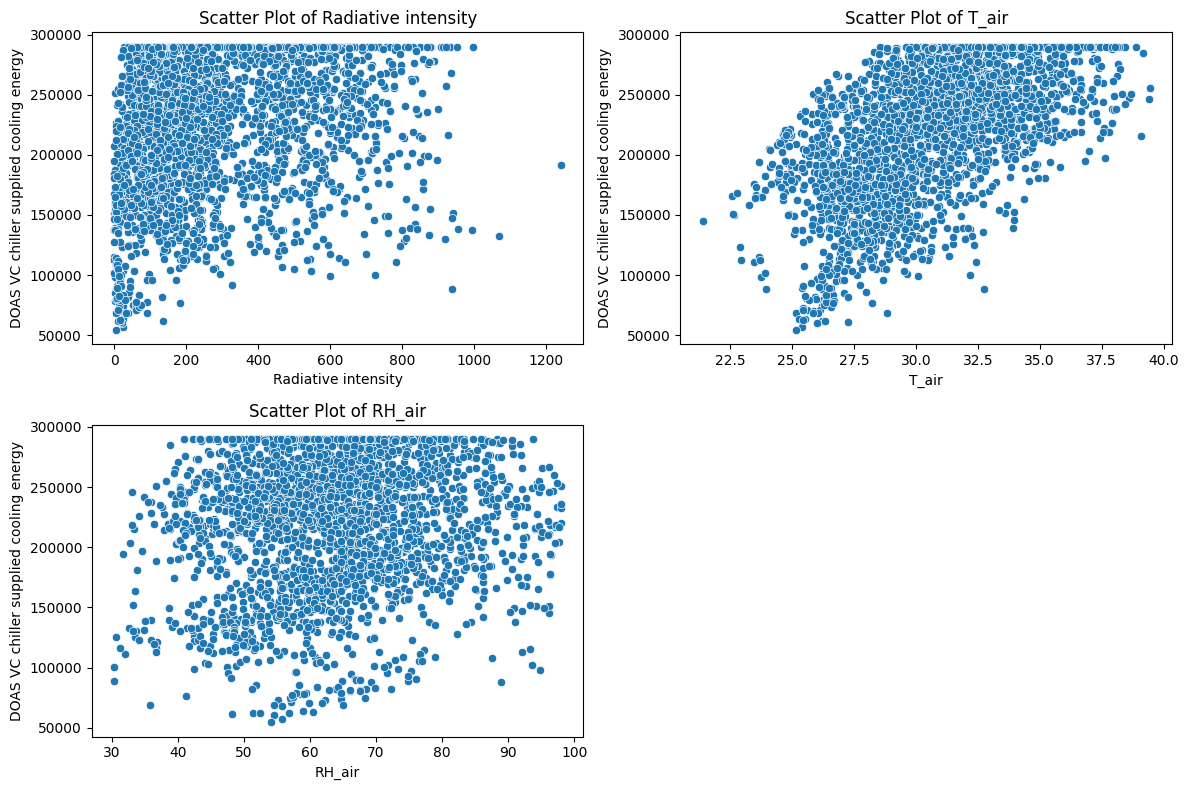

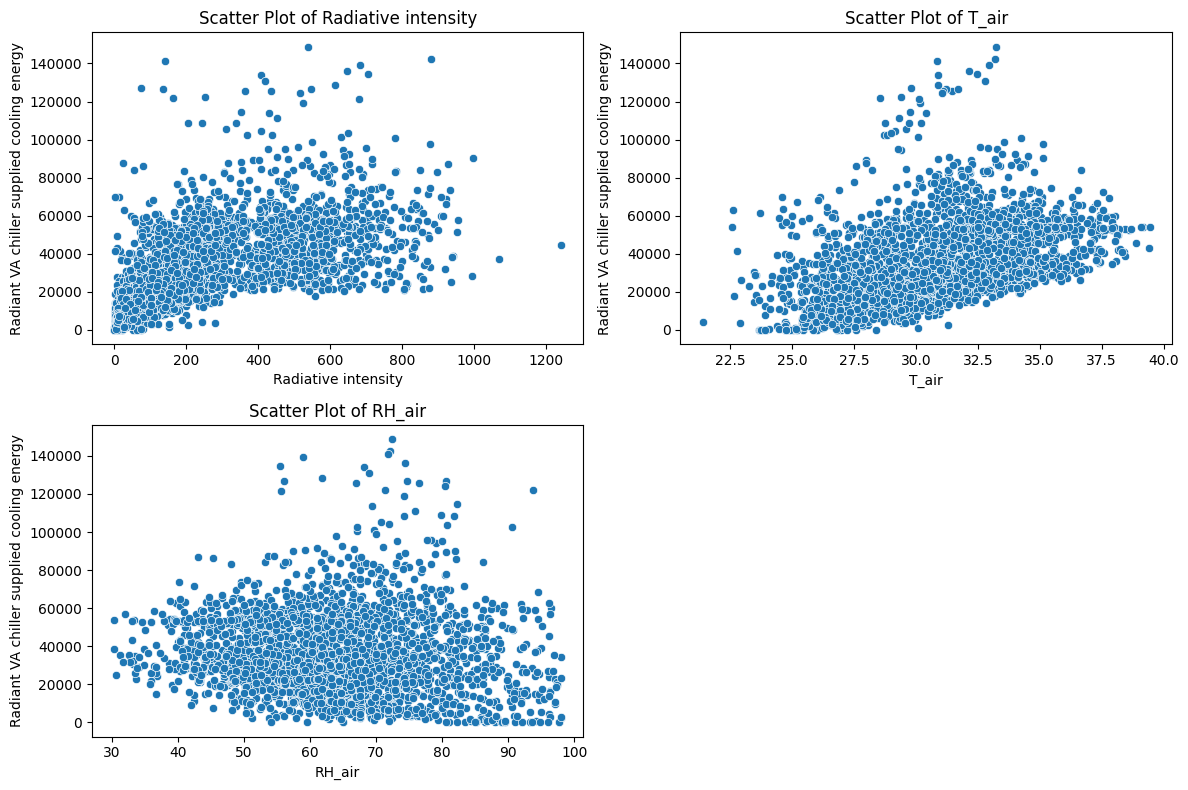

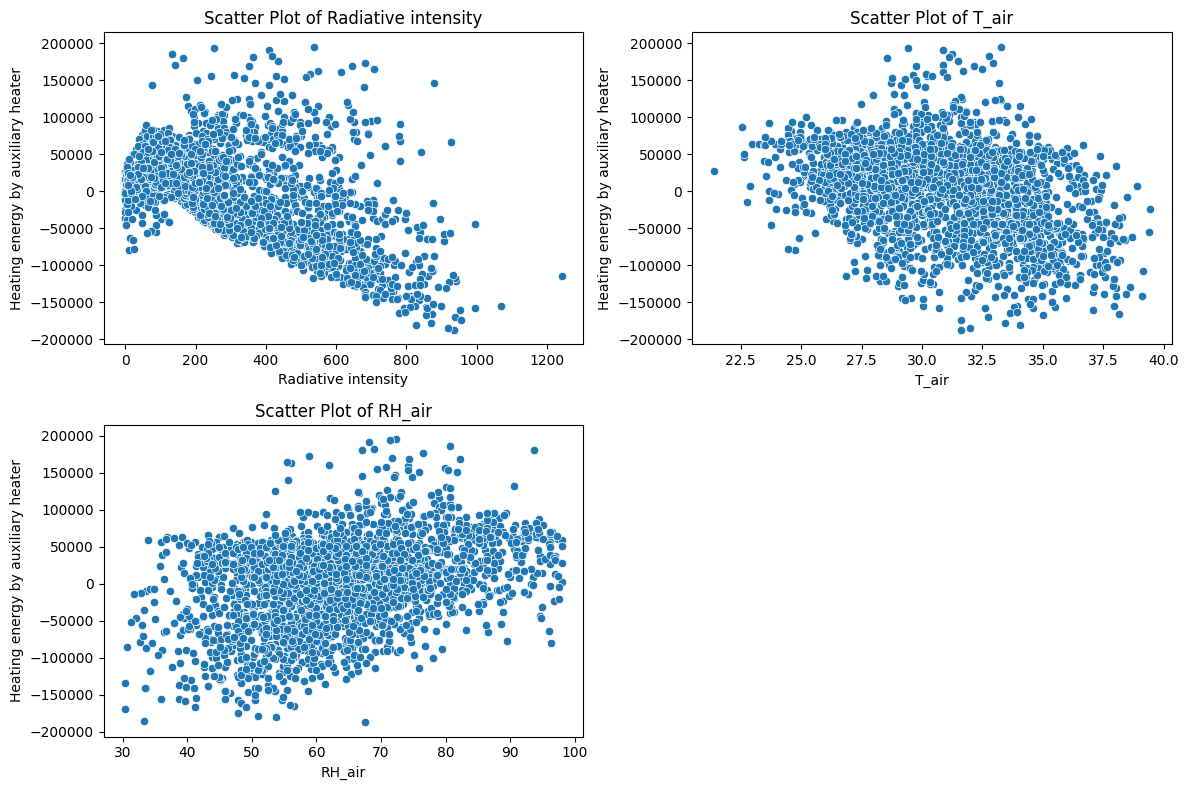

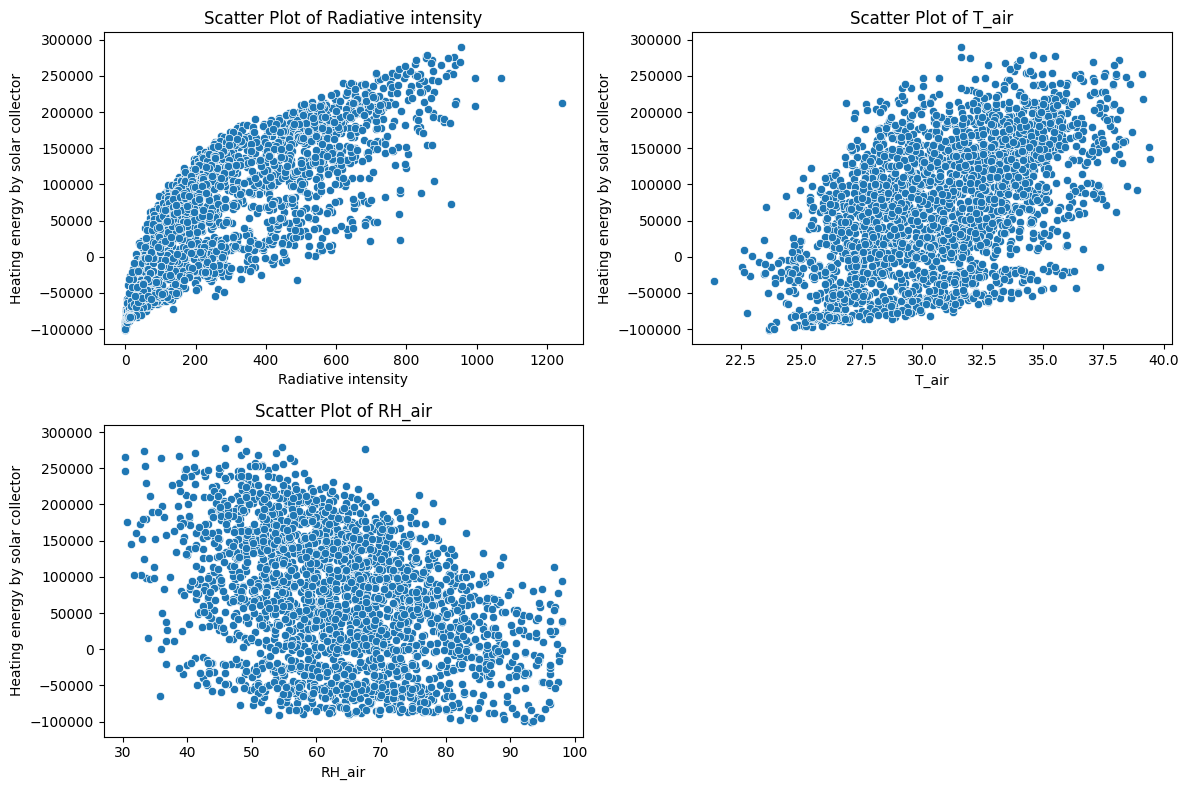

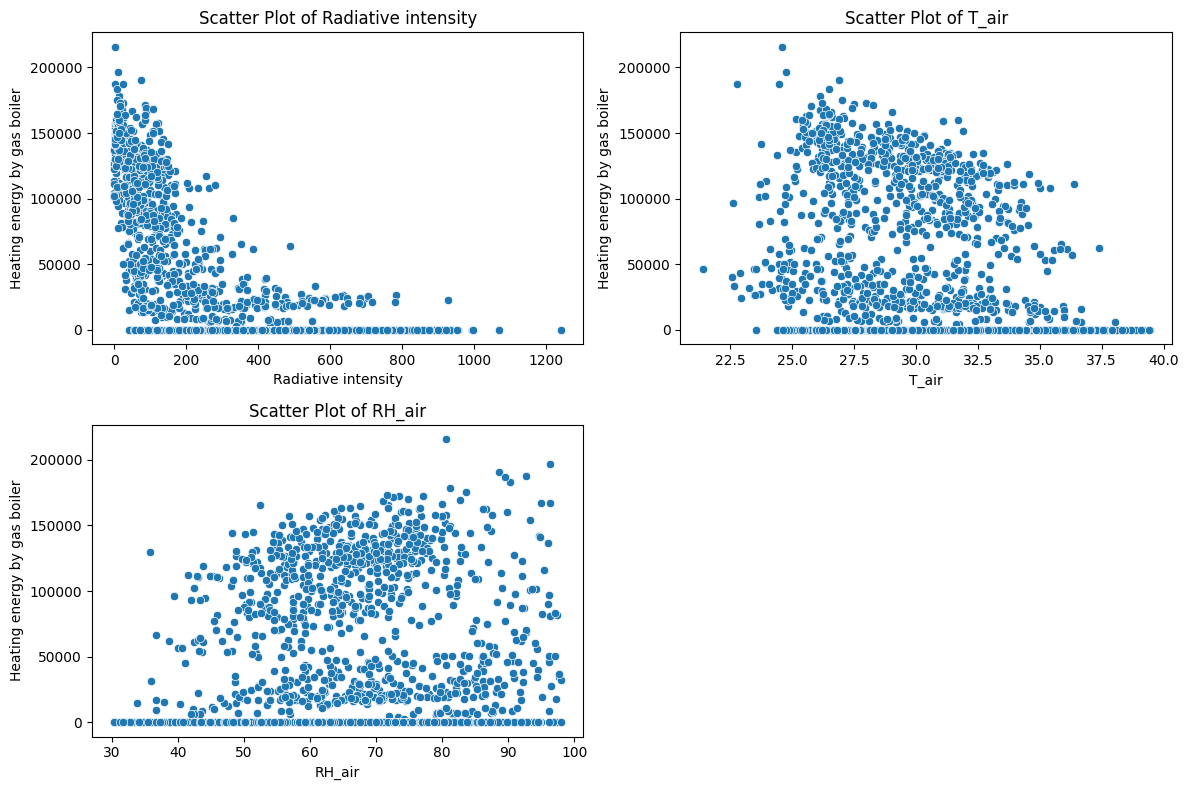

In [10]:
# Plot scatter plots for each feature
plt.figure(figsize=(12, 8))

for i, feature in enumerate(Data.columns[1:4]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='DOAS VC chiller supplied cooling energy', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[1:4]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Radiant VA chiller supplied cooling energy', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[1:4]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Heating energy by auxiliary heater', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[1:4]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Heating energy by solar collector', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[1:4]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Heating energy by gas boiler', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

Outliers in Radiative intensity:
       S.No.  Radiative intensity    T_air  RH_air  \
83      82.0            1241.7500  26.8625  75.875   
84      83.0             942.0625  28.2625  54.250   
144    143.0            1069.6880  30.0375  41.375   
306    305.0             955.3750  31.6000  47.875   
384    383.0             995.2500  30.7000  39.625   
853    852.0             996.5000  35.1250  59.250   
1225  1224.0             953.3750  37.0625  48.250   

      DOAS VC chiller supplied cooling energy  \
83                                   191825.1   
84                                   151632.9   
144                                  132611.4   
306                                  137997.9   
384                                  137217.8   
853                                  290021.9   
1225                                 290021.9   

      Radiant VA chiller supplied cooling energy  \
83                                      44726.93   
84                                   

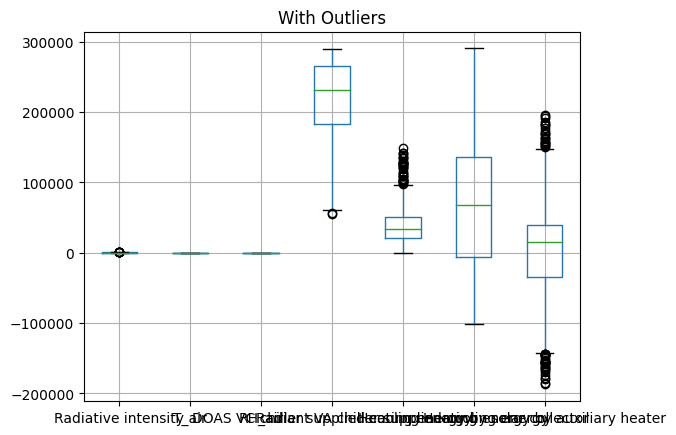

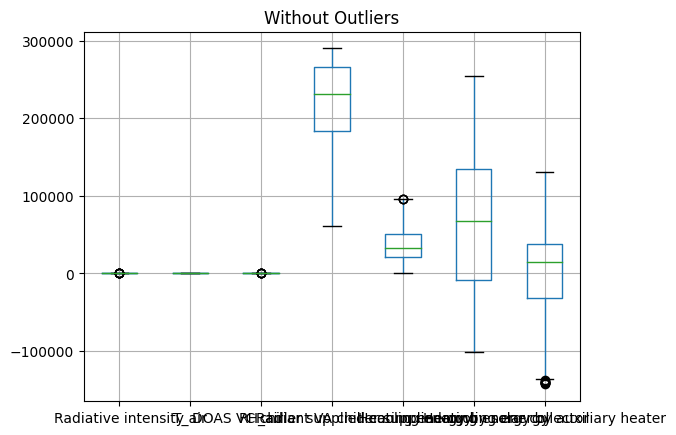

In [11]:
# Function to detect outliers using IQR
Data = Data.drop('Heating energy by gas boiler', axis = 1)
def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Specify the columns for which you want to detect outliers
columns_to_check = ['Radiative intensity', 'T_air', 'RH_air', 'DOAS VC chiller supplied cooling energy', 'Radiant VA chiller supplied cooling energy',  'Heating energy by solar collector','Heating energy by auxiliary heater']

# Detect outliers for each column
outliers_dict = {}
for column in columns_to_check:
    outliers_dict[column] = detect_outliers(Data[column])

# Display outliers
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    print(Data[outliers])

# Drop rows containing outliers
outliers_rows = outliers_dict[columns_to_check[0]]
for column in columns_to_check[1:]:
    outliers_rows |= outliers_dict[column]

cleaned_data = Data[~outliers_rows]

# Visualize the outliers using box plots
Data.boxplot(column=columns_to_check)
plt.title("With Outliers")
plt.show()

cleaned_data.boxplot(column=columns_to_check)
plt.title("Without Outliers")
plt.show()

In [12]:
cleaned_data.shape
cleaned_data

,S.No.,Radiative intensity,T_air,RH_air,DOAS VC chiller supplied cooling energy,Radiant VA chiller supplied cooling energy,Heating energy by solar collector,Heating energy by auxiliary heater,Timestamp,Year,Month,Day
2,1.0,269.9375,24.8000,90.500,193189.00,14366.480,-22115.20,64837.040,1.672650e+09,2023,1,2
3,2.0,451.0000,26.4000,82.750,208709.90,34892.060,71372.86,18735.790,1.672654e+09,2023,1,2
4,3.0,257.5000,27.7500,72.750,204338.60,30993.460,79076.78,10746.260,1.672657e+09,2023,1,2
5,4.0,241.8750,28.5125,64.000,189399.40,21920.070,101663.50,-12261.100,1.672661e+09,2023,1,2
6,5.0,179.9375,28.6375,59.125,106161.80,29668.820,80126.27,9276.150,1.672664e+09,2023,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2596.0,228.1875,28.5875,59.250,175259.40,27588.770,87765.03,4465.102,1.703858e+09,2023,12,29
2598,2597.0,130.8750,27.9625,61.875,172859.10,17531.660,27514.84,50696.970,1.703862e+09,2023,12,29
2599,2598.0,50.9375,27.2625,65.500,171863.10,5750.690,-37486.20,31044.520,1.703866e+09,2023,12,29
2600,2599.0,103.1875,26.6250,70.125,174849.90,3321.207,-51861.10,23646.920,1.703869e+09,2023,12,29


In [13]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

X = cleaned_data[['Timestamp','Year','Month','Day','Radiative intensity','T_air','RH_air']].values
y = cleaned_data[['DOAS VC chiller supplied cooling energy','Radiant VA chiller supplied cooling energy','Heating energy by solar collector','Heating energy by auxiliary heater']].values

# Initialize the MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
# scaler = StandardScaler()
X_Normalized = scaler_x.fit_transform(X)
Y_Normalized = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_Normalized, Y_Normalized, test_size=0.2, random_state=42)

# y_train[:,2] = y_train[:,2] * 2
# y_test[:,2] = y_test[:,2] * 2
# print(y_train)


In [130]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers , regularizers
from tensorflow.keras.regularizers import l1

model = models.Sequential()

# Input layer
model.add(layers.Dense(16, activation='relu', input_shape=(7,)))

model.add(layers.Dense(32, activation='relu' ))

model.add(layers.Dense(64, activation='relu' ))

model.add(layers.Dense(128, activation='relu' ))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(128, activation='relu'))

# model.add(layers.Dense(64, activation='relu'))

# model.add(layers.Dense(32, activation='relu'))

# model.add(layers.Dense(16, activation='relu'))

# model.add(layers.Dense(8, activation='relu'))



# # # Input layer
# model.add(layers.Dense(16, activation='relu', input_shape=(7,)))

# model.add(layers.Dense(32, activation='relu' ))

# model.add(layers.Dense(64, activation='relu' ))

# model.add(layers.Dense(128, activation='relu' ))

# model.add(layers.Dense(256, activation='relu'))


# # Input layer
# model.add(layers.Dense(16, activation='relu', input_shape=(7,)))

# model.add(layers.Dense(32, activation='relu' ))

# model.add(layers.Dense(64, activation='relu' ))

# model.add(layers.Dense(32, activation='relu'))

# model.add(layers.Dense(16, activation='relu'))

# model.add(layers.Dense(8, activation='relu'))

# Output layer
# model.add(layers.Dense(4, activation='linear'))

# Input layer
# model.add(layers.Dense(8, activation='relu', input_shape=(7,)))

# model.add(layers.Dense(16, activation='relu' ))

# model.add(layers.Dense(32, activation='relu' ))

# model.add(layers.Dense(16, activation='relu' ))
# Output layer
model.add(layers.Dense(4, activation='linear'))

# Display the model summary
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_260 (Dense)           (None, 16)                128       
                                                                 
 dense_261 (Dense)           (None, 32)                544       
                                                                 
 dense_262 (Dense)           (None, 64)                2112      
                                                                 
 dense_263 (Dense)           (None, 128)               8320      
                                                                 
 dropout_58 (Dropout)        (None, 128)               0         
                                                                 
 dense_264 (Dense)           (None, 256)               33024     
                                                                 
 dense_265 (Dense)           (None, 4)               

In [131]:
# # Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=42, validation_data=(X_test, y_test), verbose =1)

Epoch 1/150
49/49 [==============================] - 2s 8ms/step - loss: 0.0727 - val_loss: 0.0359
Epoch 2/150
49/49 [==============================] - 0s 5ms/step - loss: 0.0295 - val_loss: 0.0230
Epoch 3/150
49/49 [==============================] - 0s 6ms/step - loss: 0.0227 - val_loss: 0.0207
Epoch 4/150
49/49 [==============================] - 0s 6ms/step - loss: 0.0201 - val_loss: 0.0175
Epoch 5/150
49/49 [==============================] - 0s 6ms/step - loss: 0.0179 - val_loss: 0.0169
Epoch 6/150
49/49 [==============================] - 0s 7ms/step - loss: 0.0165 - val_loss: 0.0149
Epoch 7/150
49/49 [==============================] - 0s 7ms/step - loss: 0.0160 - val_loss: 0.0146
Epoch 8/150
49/49 [==============================] - 0s 6ms/step - loss: 0.0153 - val_loss: 0.0150
Epoch 9/150
49/49 [==============================] - 0s 6ms/step - loss: 0.0152 - val_loss: 0.0134
Epoch 10/150
49/49 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.0144
Epoch 11/

In [132]:
import numpy as np
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

mae = [(mean_absolute_error(y_test[:, i], y_pred[:, i])) for i in range(4)]
mse = [(mean_squared_error(y_test[:, i], y_pred[:, i])) for  i in range(4)]
r_squared = [(r2_score(y_test[:, i], y_pred[:, i])) for i in range(4)]

mae_train = [(mean_absolute_error(y_train[:, i], y_pred_train[:, i])) for i in range(4)]
mse_train = [(mean_squared_error(y_train[:, i], y_pred_train[:, i])) for  i in range(4)]
r_squared_train = [(r2_score(y_train[:, i], y_pred_train[:, i])) for i in range(4)]
print('For train Data')
for i, r2_value in enumerate(r_squared_train):
    print(f'R-squared for Output Dimension {i}: {r2_value}')
print('\n')
for i, mse_value in enumerate(mse_train):
    print(f'Mean Absolute Error (MSE){i}: {mse_value}')
print('\n')
for i, mae_value in enumerate(mae_train):
    print(f'Mean Squared Error (MAE){i}: {mae_value}')
print('\n')
print(f'Mean Absolute Error (MAE): {np.mean(mae_train)}')
print(f'Mean Squared Error (MSE): {np.mean(mse_train)}')
print(f'R-squared: {np.mean(r_squared_train)}')


print('For test Data')
for i, r2_value in enumerate(r_squared):
    print(f'R-squared for Output Dimension {i}: {r2_value}')
print('\n')
for i, mse_value in enumerate(mse):
    print(f'Mean Absolute Error (MSE){i}: {mse_value}')
print('\n')
for i, mae_value in enumerate(mae):
    print(f'Mean Squared Error (MAE){i}: {mae_value}')
print('\n')
print(f'Mean Absolute Error (MAE): {np.mean(mae)}')
print(f'Mean Squared Error (MSE): {np.mean(mse)}')
print(f'R-squared: {np.mean(r_squared)}')


# Inverse transform predictions to original scale
y_pred_original_scale = scaler_y.inverse_transform(y_pred)
y_test_original_scale = scaler_y.inverse_transform(y_test)

# Calculate R-squared
print('\n')
print('For scaled data')
r_squared = r2_score(y_test_original_scale, y_pred_original_scale)
print(f'R-squared for original value(Scaled): {r_squared}')

mae_values = [mean_absolute_error(y_test_original_scale[:, i], y_pred_original_scale[:, i]) for i in range(4)]
mse_values = [mean_squared_error(y_test_original_scale[:, i], y_pred_original_scale[:, i]) for i in range(4)]
r2_values = [r2_score(y_test_original_scale[:, i], y_pred_original_scale[:, i]) for i in range(4)]

# Display R-squared values for each output
for i, r2_value in enumerate(r2_values):
    print(f'R-squared for Output Dimension {i}: {r2_value}')


64/64 [==============================] - 0s 2ms/step
For train Data
R-squared for Output Dimension 0: 0.8629611926695857
R-squared for Output Dimension 1: 0.7374457600104987
R-squared for Output Dimension 2: 0.889505985568871
R-squared for Output Dimension 3: 0.786205011962604


Mean Absolute Error (MSE)0: 0.007731698983383641
Mean Absolute Error (MSE)1: 0.010425896298502466
Mean Absolute Error (MSE)2: 0.0065568960843941015
Mean Absolute Error (MSE)3: 0.00773908523605197


Mean Squared Error (MAE)0: 0.061388113997201246
Mean Squared Error (MAE)1: 0.07836733900638257
Mean Squared Error (MAE)2: 0.05888321464284103
Mean Squared Error (MAE)3: 0.0638847693003444


Mean Absolute Error (MAE): 0.06563085923669232
Mean Squared Error (MSE): 0.008113394150583045
R-squared: 0.8190294875528898
For test Data
R-squared for Output Dimension 0: 0.811383962840504
R-squared for Output Dimension 1: 0.6624971514951312
R-squared for Output Dimension 2: 0.8482393810583693
R-squared for Output Dimension 3: 0.

In [ ]:
# Plot training loss and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(y_test_original_scale,'\n')
print(y_pred_original_scale)



# Average R-squared value across all output dimensions
average_r2 = np.mean(r2_values)
print(f'Average R-squared across all Output Dimensions: {average_r2}')